Populating the interactive namespace from numpy and matplotlib


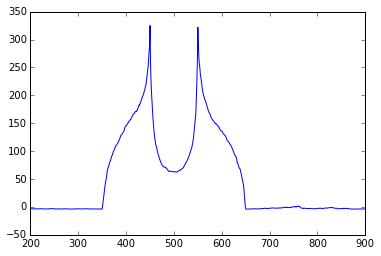

In [4]:
 
import numpy as np
import mdlcpstat#######
import matplotlib.pyplot as plt


# generate data (1-variate gaussian, 2 change points that are close)
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(450,550):
    data[i] = data[i] + 10
for i in range(550,1000):
    data[i] = data[i] + 20


# calculate change scores
stat = mdlcpstat.MDLCPStat(h=100, lossfunc=mdlcpstat.loss_gaussian, fill_blank="offline")######
score = stat.transform(X=data)

#plot scores
#print(score[range(499,503)])
plt.plot(range(200,1000),score[range(200,1000)])

Populating the interactive namespace from numpy and matplotlib
[ 139.03166666  138.32254267  138.55572413  139.38234108  139.42392943
  140.25028307  140.30318362  140.09400571  140.34323666  139.24210413
  141.13207882  103.97246866   88.10699249   76.98652751   66.93794714
   58.36079086   50.80419341   44.51427606   37.74294521   33.74951293]


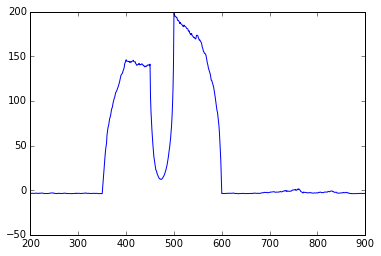

In [10]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat#######
import matplotlib.pyplot as plt


# generate data (1-variate gaussian, 2 change points that are close)
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(450,500):
    data[i] = data[i] + 10
for i in range(500,1000):
    data[i] = data[i] - 5

t_true = [450, 500]
# calculate change scores
stat = mdlcpstat.MDLCPStat(h=100, lossfunc=mdlcpstat.loss_gaussian, fill_blank="offline")######
score2 = stat.transform(X=data)

#plot scores
print(score2[range(440,460)])
score2_ = np.ones(1000) * (min(score2[200:1000]))
score2_[200:1000] = score2[200:1000]
plt.plot(range(200,1000),score3[range(200,1000)])




0.653301333333


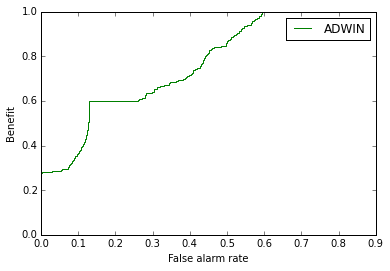

In [13]:
import evaluation as ev
from sklearn.metrics import roc_curve, auc

T =200
x3 = []
y3 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e3 = ev.B(score2_, beta, t_true, T)
    f3  = ev.N(score2_, beta, t_true, T)
    g3 = ev.supB(score2_, t_true, T)
    h3 = ev.supN(score2_, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

- →誤検出が起きている

Populating the interactive namespace from numpy and matplotlib
[ 153.21120457  181.37925542  151.62813998  130.69205615]
-3.4952868778


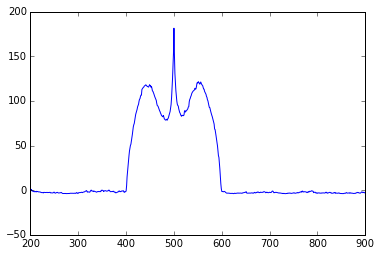

In [5]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat
import matplotlib.pyplot as plt

# generate data (linear regression, 1 change point)
n = 1000
W = np.ones((2, n))
beta = np.array([1,1]).T

for i in range(0,n):
    W[1,i] = i+1
mu = np.dot(W.T, beta)
var = np.matrix(numpy.identity(n))
rng = np.random.RandomState(123)
data = np.random.multivariate_normal(mu, var, 1).T
for i in range(500,1000):
    data[i,0] = data[i,0] + 10

# calculate change scores
stat = mdlcpstat.MDLCPStat(h=100, lossfunc=mdlcpstat.loss_regression, fill_blank="offline")
score = stat.transform(X=data)

#plot scores
print(score[range(499,503)])
print(score[800])
plt.plot(range(200,1000),score[range(200,1000)])

Populating the interactive namespace from numpy and matplotlib
[  98.58214975   97.73737306   95.62612253   94.71560582   95.99057141
   94.20177671   94.27680086   94.04197826   93.13764578   94.45876637
   91.61178325   92.39022044   92.987883     95.50415951   96.85748929
   98.4040003    98.81179411  100.26297158  102.63342347  105.80527365
  107.16518078  111.10940598  111.50009176  113.14050731  114.65255926
  116.42198722  117.35881707  118.40809606  120.49988379  120.55255964
  121.41070134  122.87837388  123.42506081  124.45786202  125.47248244
  126.59555691  126.19619195  128.80573815  128.22157074  129.04638385]
-2.78966362366


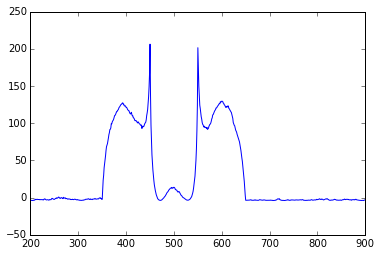

In [6]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat
import matplotlib.pyplot as plt

# generate data (linear regression, 2 change point that are close)
n = 1000
W = np.ones((2, n))
beta = np.array([1,1]).T

for i in range(0,n):
    W[1,i] = i+1
mu = np.dot(W.T, beta)
var = np.matrix(numpy.identity(n))
rng = np.random.RandomState(123)
data = np.random.multivariate_normal(mu, var, 1).T
for i in range(450,550):
    data[i,0] = data[i,0] + 10
for i in range(550,1000):
    data[i,0] = data[i,0] + 20
    
# calculate change scores
stat = mdlcpstat.MDLCPStat(h=100, lossfunc=mdlcpstat.loss_regression, fill_blank="offline")
score = stat.transform(X=data)

#plot scores
print(score[range(560,600)])
print(score[800])
plt.plot(range(200,1000),score[range(200,1000)])

- →good

Populating the interactive namespace from numpy and matplotlib


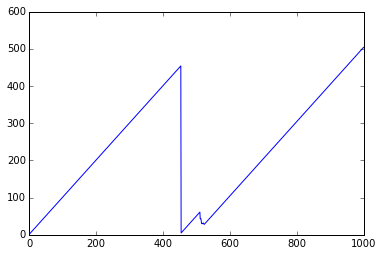

In [18]:
 %pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import matplotlib.pyplot as plt

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(450,500):
    data[i] = data[i] + 10
for i in range(500,1000):
    data[i] = data[i] + 5

# calculate change scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.3)


plt.plot(size)

Populating the interactive namespace from numpy and matplotlib


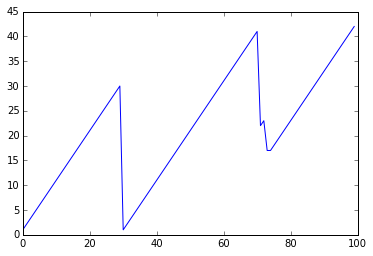

In [17]:
 %pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import matplotlib.pyplot as plt

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=100)
for i in range(30,60):
    data[i] = data[i] + 10
for i in range(60,100):
    data[i] = data[i] + 5

# calculate change scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.3)


plt.plot(size)

Populating the interactive namespace from numpy and matplotlib


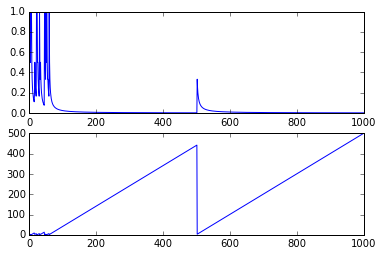

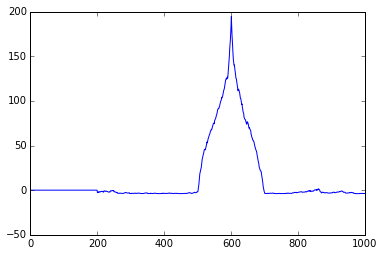

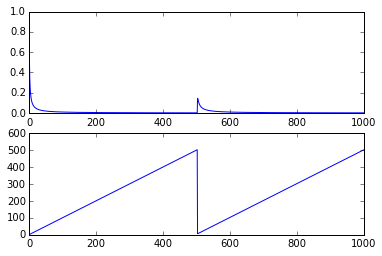

0.989520584577
0.986698217247
0.985165713101


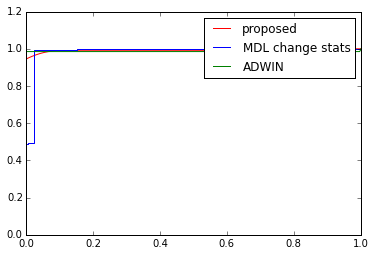

In [4]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 5
t_true = [0, 500]
T = 200

plt.figure(1)
# calculate change scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.07)
score = ev.InvRunLen(size)
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size)
plt.show()


plt.figure(3)
### score2_max = 407.3865
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * min(score2[200:1000]) * 0
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()


plt.figure(4)
# calculate change scores
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3)
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3)
plt.show()


plt.figure(2)
x = []
y = []
p = [-0.1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')


x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [-0.1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()


Populating the interactive namespace from numpy and matplotlib


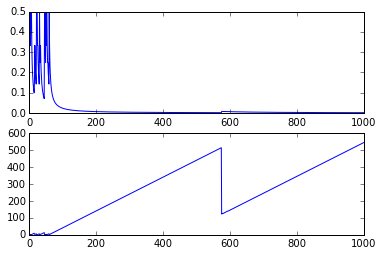

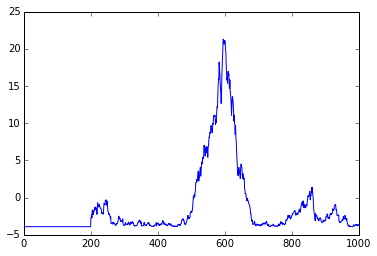

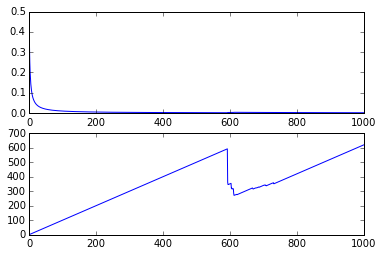

0.7234486733
0.492115754561
0.66296185738


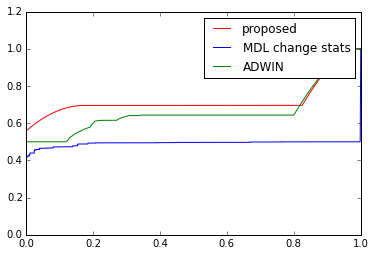

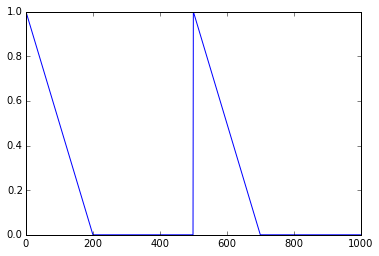

In [6]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 1
t_true = [0, 500]
T = 200

plt.figure(1)
# calculate change scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.07)
score = ev.InvRunLen(size)
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size)
plt.show()


plt.figure(3)
### score2_max = 407.3865
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]))
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()


plt.figure(4)
# calculate change scores
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3)
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3)
plt.show()


plt.figure(2)
x = []
y = []
p = [-0.1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')


x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [-0.1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib


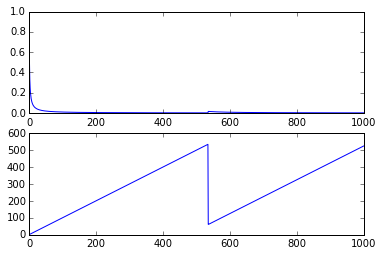

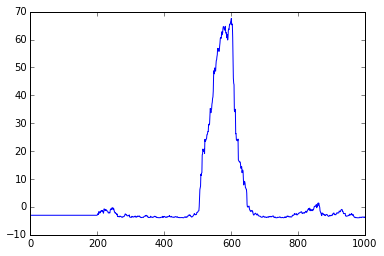

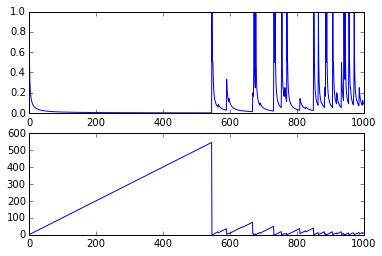

0.843046745439
0.794151368159
0.480226036484


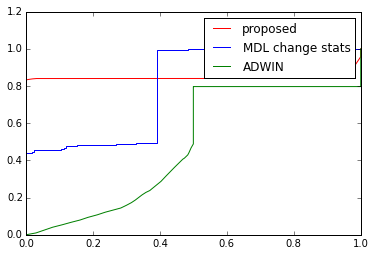

In [8]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] * 4
t_true = [0, 500]
T = 200

plt.figure(1)
# calculate change scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.2)
score = ev.InvRunLen(size)
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size)
plt.show()


plt.figure(3)
### score2_max = 407.3865
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (-3)
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()
 

plt.figure(4)
# calculate change scores
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3)
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3)
plt.show()


plt.figure(2)
x = []
y = []
p = [-0.1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')


x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [-0.1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()



Populating the interactive namespace from numpy and matplotlib


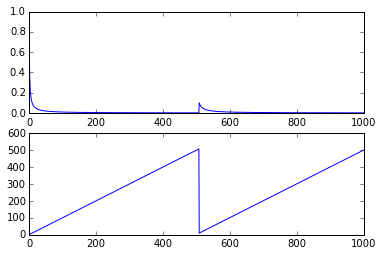

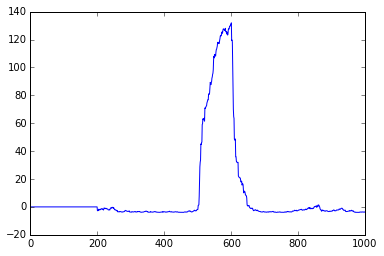

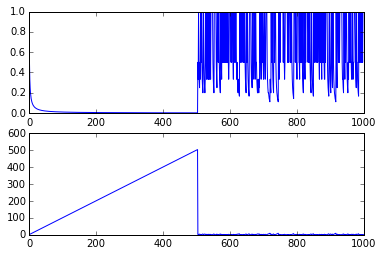

0.960899647595
0.980407628524
0.61372566335


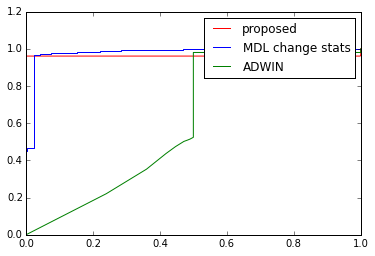

In [5]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] * 8
t_true = [0, 500]
T = 200

plt.figure(1)
# calculate change scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.3)
score = ev.InvRunLen(size)
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size)
plt.show()


plt.figure(3)
### score2_max = 407.3865
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000])) * 0
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()


plt.figure(4)
# calculate change scores
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3)
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3)
plt.show()


plt.figure(2)
x = []
y = []
p = [-0.1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')


x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [-0.1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()


Populating the interactive namespace from numpy and matplotlib
0.980751515152


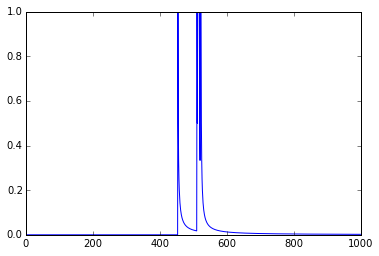

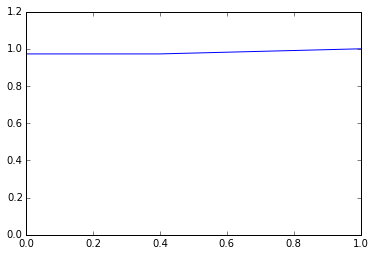

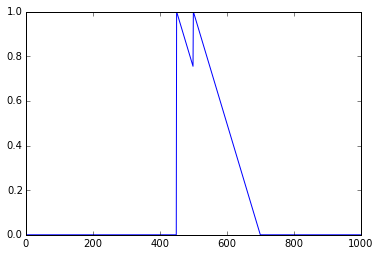

In [43]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(450,500):
    data[i] = data[i] + 10
for i in range(500,1000):
    data[i] = data[i] + 5

# calculate change scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.3)
score = ev.InvRunLen(size)
plt.plot(score)

plt.figure(2)
t_true = [450, 500]
T = 200
x = []
y = []
p = [-0.1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
plt.plot(x,y)
print(auc(x,y))

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib
0.275581674959


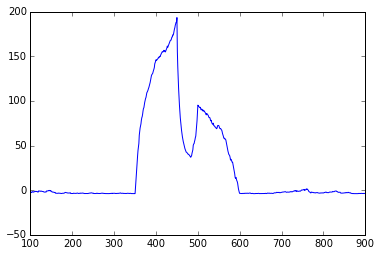

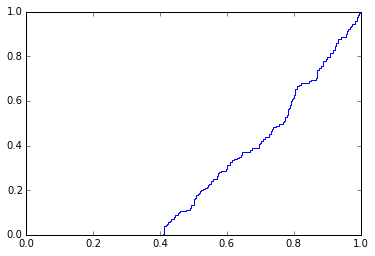

In [44]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(450,500):
    data[i] = data[i] + 10
for i in range(500,1000):
    data[i] = data[i] + 5

stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="offline")
score2 = stat.transform(X=data)
plt.plot(score2)

score2_ = score2[100:900]

plt.figure(2)
t_true = [500]
T = 200
x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2, y2))
plt.plot(x2,y2)

Populating the interactive namespace from numpy and matplotlib
0.95938681592


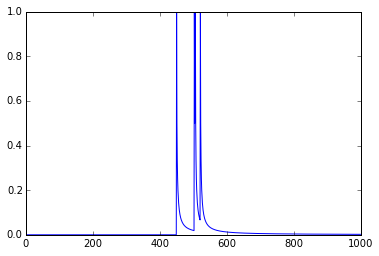

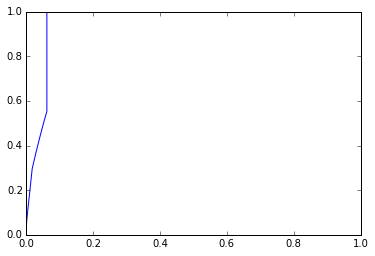

In [45]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(450,500):
    data[i] = data[i] + 10
for i in range(500,1000):
    data[i] = data[i] + 5
    
# calculate change scores
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3)
plt.plot(score3)

plt.figure(2)
t_true = [500]
T = 200
x3 = []
y3 = []
p = [-0.1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3)

In [52]:
i = 
print(x[i])
print(y[i])

0.4
0.972502164502


Populating the interactive namespace from numpy and matplotlib
0.956158208955


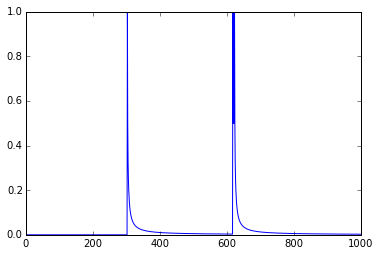

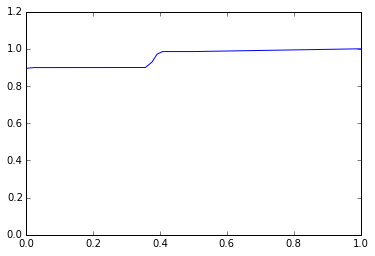

In [14]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(300,600):
    data[i] = data[i] + 10
for i in range(600,1000):
    data[i] = data[i] + 5

# calculate change scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.3)
score = ev.InvRunLen(size)
plt.plot(score)

plt.figure(2)
t_true = [300, 600]
T = 200
x = []
y = []
p = [-0.1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
plt.plot(x,y)
print(auc(x,y))

Populating the interactive namespace from numpy and matplotlib


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


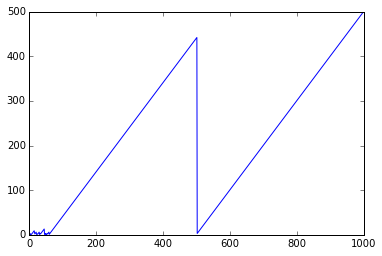

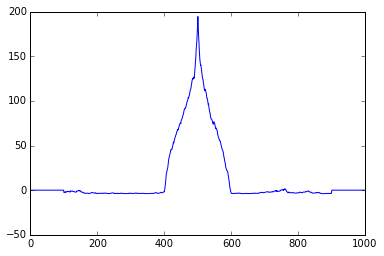

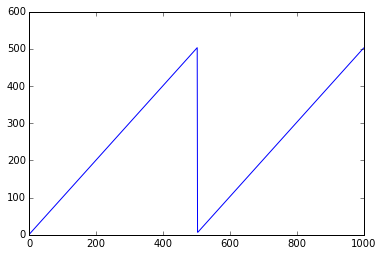

0.49505
0.987097259136
0.49015


In [1]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 5
t_true = [0, 500]
T = 100

plt.figure(1)
# calculate change scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.07)
score = ev.InvRunLen(size)
plt.plot(size)
plt.show()


plt.figure(3)
### score2_max = 407.3865
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="offline")
score2 = stat.transform(X=data)
score2_ = np.zeros(1000)
score2_[100:900] = score2[100:900]
plt.plot(score2_)
plt.show()


plt.figure(4)
# calculate change scores
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3)
plt.plot(size3)
plt.show()


plt.figure(2)
x = []
y = []
p = [-0.1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')


x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [-0.1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()


Populating the interactive namespace from numpy and matplotlib


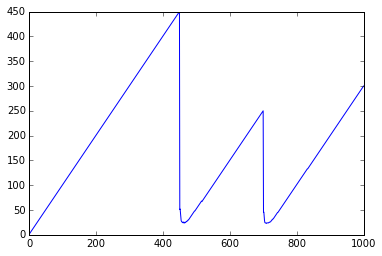

In [12]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin
import matplotlib.pyplot as plt

# generate data (1-variate gaussian, 2 change points)
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(450,700):
    data[i] = data[i] + 10
for i in range(700,1000):
    data[i] = data[i] + 20


# calculate change scores
ins = mdlcpstat_adwin.MDLCPStat_adwin(lossfunc=mdlcpstat_adwin.nml_gaussian, fill_blank="online")
size2 = ins.transform(X=data)

# plot sizes
# print(size[range(490,505)])
plt.plot(size2[range(0, 1000)])

In [7]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin
import matplotlib.pyplot as plt

# generate data (linear regression, 2 change point that are close)
n = 1000
W = np.ones((2, n))
beta = np.array([1,1]).T

for i in range(0,n):
    W[1,i] = i+1
mu = np.dot(W.T, beta)
var = np.matrix(numpy.identity(n))
rng = np.random.RandomState(123)
data = np.random.multivariate_normal(mu, var, 1).T
for i in range(450,700):
    data[i,0] = data[i,0] + 10
for i in range(700,1000):
    data[i,0] = data[i,0] + 20
    
# calculate change scores
ins = mdlcpstat_adwin.MDLCPStat_adwin(lossfunc=mdlcpstat_adwin.loss_regression)
size4 = ins.transform(X=data)

#plot sizes
plt.plot(size4[range(0, 1000)])

Populating the interactive namespace from numpy and matplotlib


Populating the interactive namespace from numpy and matplotlib


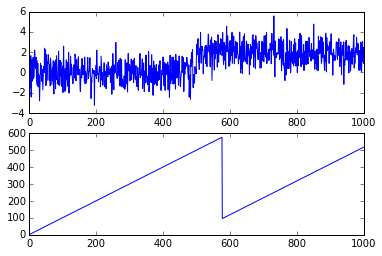

In [1]:
 %pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import matplotlib.pyplot as plt


# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 2

# calculate change scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.2)

# plot 
f, a = plt.subplots(2, 1)
a[0].plot(data)
a[1].plot(size)



Populating the interactive namespace from numpy and matplotlib


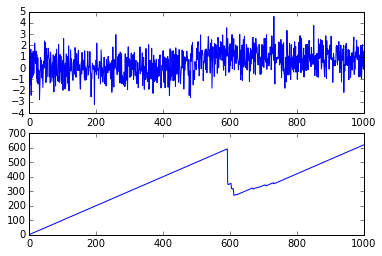

In [2]:
 %pylab inline --no-import-all
import numpy as np
import adwin 
import matplotlib.pyplot as plt


# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 1

# calculate change scores
ins = adwin.ADWIN(a=1)
size = ins.transform(X=data, delta = 0.5)

# plot 
f, a = plt.subplots(2, 1)
a[0].plot(data)
a[1].plot(size)


Populating the interactive namespace from numpy and matplotlib


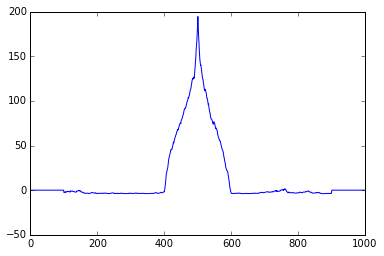

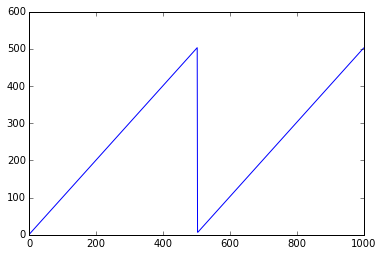

0.985209494196
0.705079436153
0.985148631841


In [17]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 5
t_true = [0, 500]
T = 200

plt.figure(1)
# calculate change scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.08)
score = ev.InvRunLen(size)
plt.plot(size)
plt.show()


plt.figure(3)
### score2_max = 407.3865
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="offline")
score2 = stat.transform(X=data)
score2_ = np.zeros(1000)
score2_[100:900] = score2[100:900]
plt.plot(score2_)
plt.show()


plt.figure(4)
# calculate change scores
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3)
plt.plot(size3)
plt.show()


plt.figure(2)
x = []
y = []
p = [-0.1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')


x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [-0.1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.legend()
plt.show()

## delmu = +5
#0.882098880597
#0.317377694859
#0.979580223881

## delmu = +1
#0.175209421642
#0.338881260365
#0.500588028607

## delsig = *4
#0.715457089552
#0.342637893864
#0.586227238806

## delsig = *8
#0.946231343284
#0.340164427861
#0.793265764925

## delsig = *2
#0.102569060945
#0.352527777778
#0.5



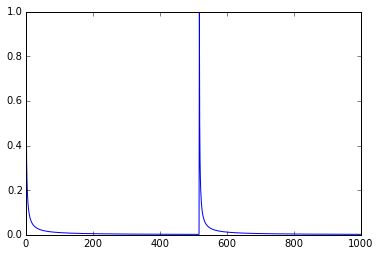

In [4]:
plt.plot(score)

Populating the interactive namespace from numpy and matplotlib


0.214777777778


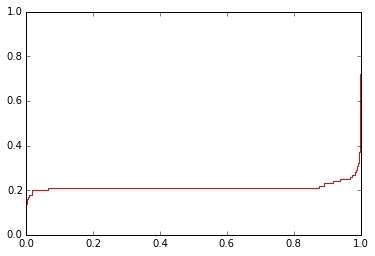

In [33]:
 %pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin as mdladwn
import matplotlib.pyplot as plt

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)

for i in range(500,1000):
    data[i] = data[i] + 5
t_true = [500]
T = 100

#calculate scores
ins = mdladwn2.MDLCPStat_adwin(lossfunc=mdladwn2.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.3)
score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

import evaluation as ev
from sklearn.metrics import roc_curve, auc

plt.figure(2)
#t_true = [0, 500]
#T = 200
x = []
y = []
p = [min(score) - 0.1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

In [25]:
print(size[0, 290:310])
print(size[1, 290:310])


[ 290.  291.  292.  293.  294.  295.  296.  297.  298.  299.    1.    2.
    3.    4.    5.    6.    7.    8.    9.   10.]
[-0.00761392 -0.01018476 -0.01016088 -0.00837819 -0.00240984 -0.00981799
 -0.00702532 -0.00999395 -0.00996282 -0.0099385   0.1296683  -1.25642977
 -0.94933634 -0.77756529 -0.64686956 -0.56520974 -0.48522177 -0.44546323
 -0.40211709 -0.3650865 ]


Populating the interactive namespace from numpy and matplotlib


0.946852380952


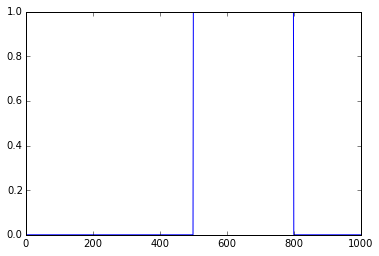

In [51]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 7
#for i in range(500,1000):
#    data[i] = data[i] + 5

# calculate change scores
ins = mdladwn.MDLCPStat_adwin(lossfunc=mdladwn.lnml_gaussian)
size = ins.transform(X=data, epsilon = 0.3)
scoreee = size[1]
#score = np.zeros(999)
#for i in range(0, 999):
#    score[i] = np.absolute(scoreee[i+1] - scoreee[i])

score = np.zeros(1000)
for i in range(0, 1000):
    score[i] = np.absolute(scoreee[i])
    
f, a = plt.subplots(3, 1)
a[0].plot(score)
a[1].plot(size[0])
a[2].plot(scoreee)
plt.show()

plt.figure(2)
t_true = [500]
T = 300
x = []
y = []
p = [min(score) - 0.1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
plt.plot(x,y)
print(auc(x,y))

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

In [46]:
i = 100
print(x[i])
print(y[i])

0.994285714286
0.68


In [47]:
print(size[0, 490:510])

[ 491.  492.  493.  494.  495.  496.  497.  498.  499.  500.  501.  502.
  503.  504.  505.  506.  507.  508.  509.   10.]
